In [1]:
import numpy as np
import pandas as pd
from pandas.plotting import scatter_matrix
from sklearn.preprocessing import RobustScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
df = pd.read_csv('../../../data/kc_house_data.csv')
df

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,0.0,...,7,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,...,7,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,0.0,0.0,...,6,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,...,7,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,...,8,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21592,263000018,5/21/2014,360000.0,3,2.50,1530,1131,3.0,0.0,0.0,...,8,1530,0.0,2009,0.0,98103,47.6993,-122.346,1530,1509
21593,6600060120,2/23/2015,400000.0,4,2.50,2310,5813,2.0,0.0,0.0,...,8,2310,0.0,2014,0.0,98146,47.5107,-122.362,1830,7200
21594,1523300141,6/23/2014,402101.0,2,0.75,1020,1350,2.0,0.0,0.0,...,7,1020,0.0,2009,0.0,98144,47.5944,-122.299,1020,2007
21595,291310100,1/16/2015,400000.0,3,2.50,1600,2388,2.0,NaN,0.0,...,8,1600,0.0,2004,0.0,98027,47.5345,-122.069,1410,1287


## a bit more cleaning (note: most screening in Pete_housing notebook)

In [3]:
df.loc[df['sqft_basement'] == '?']

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
6,1321400060,6/27/2014,257500.0,3,2.25,1715,6819,2.0,0.0,0.0,...,7,1715,?,1995,0.0,98003,47.3097,-122.327,2238,6819
18,16000397,12/5/2014,189000.0,2,1.00,1200,9850,1.0,0.0,0.0,...,7,1200,?,1921,0.0,98002,47.3089,-122.210,1060,5095
42,7203220400,7/7/2014,861990.0,5,2.75,3595,5639,2.0,0.0,0.0,...,9,3595,?,2014,0.0,98053,47.6848,-122.016,3625,5639
79,1531000030,3/23/2015,720000.0,4,2.50,3450,39683,2.0,0.0,0.0,...,10,3450,?,2002,0.0,98010,47.3420,-122.025,3350,39750
112,2525310310,9/16/2014,272500.0,3,1.75,1540,12600,1.0,0.0,0.0,...,7,1160,?,1980,0.0,98038,47.3624,-122.031,1540,11656
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21442,3226049565,7/11/2014,504600.0,5,3.00,2360,5000,1.0,0.0,0.0,...,7,1390,?,2008,0.0,98103,47.6931,-122.330,2180,5009
21447,1760650900,7/21/2014,337500.0,4,2.50,2330,4907,2.0,0.0,0.0,...,7,2330,?,2013,NaN,98042,47.3590,-122.081,2300,3836
21473,6021503707,1/20/2015,352500.0,2,2.50,980,1010,3.0,NaN,0.0,...,8,980,?,2008,0.0,98117,47.6844,-122.387,980,1023
21519,2909310100,10/15/2014,332000.0,4,2.50,2380,5737,2.0,0.0,0.0,...,7,2380,?,2010,0.0,98023,47.2815,-122.356,2380,5396


In [4]:
df['sqft_basement'] = df['sqft_basement'].str.replace('?', '0')

df.shape

(21597, 21)

In [5]:
df[['sqft_basement']] = df[['sqft_basement']].apply(pd.to_numeric)

In [6]:
df['area_basement'] = df['sqft_living']-df['sqft_above']

In [7]:
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,area_basement
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,0.0,...,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650,0
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,...,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639,400
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,0.0,0.0,...,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062,0
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,...,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000,910
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,...,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503,0


## Drop the house with 33 bedrooms

In [8]:
df.drop(15856)

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,area_basement
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,0.0,...,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650,0
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,...,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639,400
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,0.0,0.0,...,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062,0
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,...,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000,910
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,...,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21592,263000018,5/21/2014,360000.0,3,2.50,1530,1131,3.0,0.0,0.0,...,1530,0.0,2009,0.0,98103,47.6993,-122.346,1530,1509,0
21593,6600060120,2/23/2015,400000.0,4,2.50,2310,5813,2.0,0.0,0.0,...,2310,0.0,2014,0.0,98146,47.5107,-122.362,1830,7200,0
21594,1523300141,6/23/2014,402101.0,2,0.75,1020,1350,2.0,0.0,0.0,...,1020,0.0,2009,0.0,98144,47.5944,-122.299,1020,2007,0
21595,291310100,1/16/2015,400000.0,3,2.50,1600,2388,2.0,NaN,0.0,...,1600,0.0,2004,0.0,98027,47.5345,-122.069,1410,1287,0


## Replace all NaN values to 0

In [9]:
df = df.replace(np.nan, 0)
df

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,area_basement
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,0.0,0.0,...,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650,0
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,...,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639,400
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,0.0,0.0,...,770,0.0,1933,0.0,98028,47.7379,-122.233,2720,8062,0
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,...,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000,910
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,...,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21592,263000018,5/21/2014,360000.0,3,2.50,1530,1131,3.0,0.0,0.0,...,1530,0.0,2009,0.0,98103,47.6993,-122.346,1530,1509,0
21593,6600060120,2/23/2015,400000.0,4,2.50,2310,5813,2.0,0.0,0.0,...,2310,0.0,2014,0.0,98146,47.5107,-122.362,1830,7200,0
21594,1523300141,6/23/2014,402101.0,2,0.75,1020,1350,2.0,0.0,0.0,...,1020,0.0,2009,0.0,98144,47.5944,-122.299,1020,2007,0
21595,291310100,1/16/2015,400000.0,3,2.50,1600,2388,2.0,0.0,0.0,...,1600,0.0,2004,0.0,98027,47.5345,-122.069,1410,1287,0


## Descriptive stats for Price given the data

In [10]:
df.describe()['price']

count    2.159700e+04
mean     5.402966e+05
std      3.673681e+05
min      7.800000e+04
25%      3.220000e+05
50%      4.500000e+05
75%      6.450000e+05
max      7.700000e+06
Name: price, dtype: float64

## Select houses within the 25% Quartile

In [11]:
df = df.loc[df['price'] <= 322000]
df

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,area_basement
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,0.0,0.0,...,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650,0
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,0.0,0.0,...,770,0.0,1933,0.0,98028,47.7379,-122.233,2720,8062,0
6,1321400060,6/27/2014,257500.0,3,2.25,1715,6819,2.0,0.0,0.0,...,1715,0.0,1995,0.0,98003,47.3097,-122.327,2238,6819,0
7,2008000270,1/15/2015,291850.0,3,1.50,1060,9711,1.0,0.0,0.0,...,1060,0.0,1963,0.0,98198,47.4095,-122.315,1650,9711,0
8,2414600126,4/15/2015,229500.0,3,1.00,1780,7470,1.0,0.0,0.0,...,1050,730.0,1960,0.0,98146,47.5123,-122.337,1780,8113,730
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21534,880000205,7/29/2014,249000.0,3,2.00,1260,1125,2.0,0.0,0.0,...,810,450.0,2011,0.0,98106,47.5262,-122.361,1260,1172,450
21543,3438501329,5/20/2014,305000.0,2,2.50,1590,2656,2.0,0.0,0.0,...,1220,370.0,2009,0.0,98106,47.5489,-122.364,1590,2306,370
21556,6056111067,7/7/2014,230000.0,3,1.75,1140,1201,2.0,0.0,0.0,...,1140,0.0,2014,0.0,98108,47.5637,-122.295,1210,1552,0
21569,3832050760,8/28/2014,270000.0,3,2.50,1870,5000,2.0,0.0,0.0,...,1870,0.0,2009,0.0,98042,47.3339,-122.055,2170,5399,0


## Drop columns 'id' and 'sqft_above'

In [12]:
df.drop(columns=['sqft_above', 'id'], inplace=True)
df.head()

C:\Users\avalencia\Anaconda3\envs\learn-env\lib\site-packages\pandas\core\frame.py:4163: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,area_basement
0,10/13/2014,221900.0,3,1.00,1180,5650,1.0,0.0,0.0,3,7,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650,0
2,2/25/2015,180000.0,2,1.00,770,10000,1.0,0.0,0.0,3,6,0.0,1933,0.0,98028,47.7379,-122.233,2720,8062,0
6,6/27/2014,257500.0,3,2.25,1715,6819,2.0,0.0,0.0,3,7,0.0,1995,0.0,98003,47.3097,-122.327,2238,6819,0
7,1/15/2015,291850.0,3,1.50,1060,9711,1.0,0.0,0.0,3,7,0.0,1963,0.0,98198,47.4095,-122.315,1650,9711,0
8,4/15/2015,229500.0,3,1.00,1780,7470,1.0,0.0,0.0,3,7,730.0,1960,0.0,98146,47.5123,-122.337,1780,8113,730


## Heatmap showing correlations

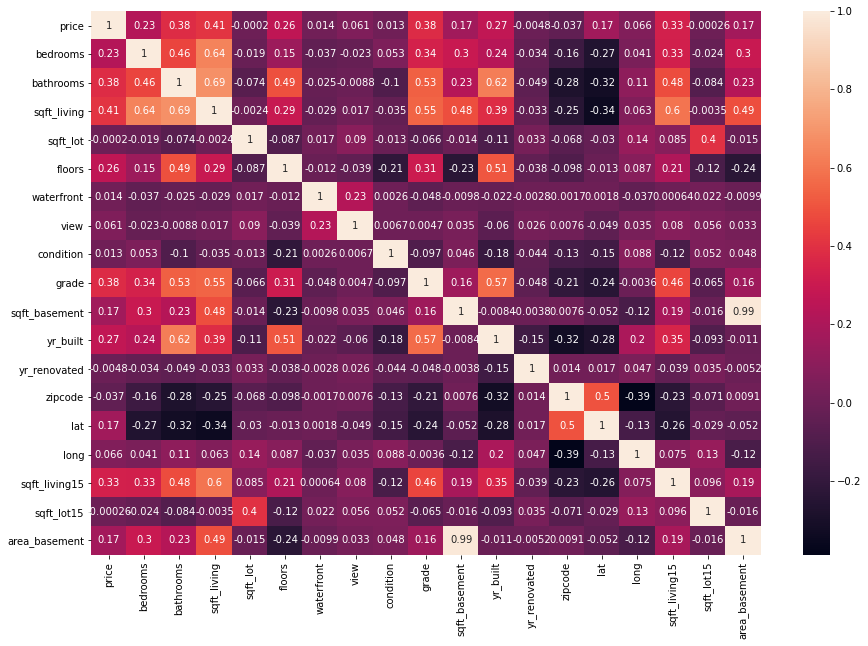

In [13]:
plt.figure(figsize=(15,10))

ax = sns.heatmap(df.corr(), annot=True);

## Start w/ Simple Model at First

In [26]:
#set X & y variables
X = df.drop(['price'], axis = 1)
y = df['price']

In [27]:
#train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=2021)

In [28]:
#run simple model w/ best predictor (sqft_living)
model_1_train = X_train[['sqft_living']] 
model_1_test = X_test[['sqft_living']]
model1 = LinearRegression()
model1.fit(model_1_train, y_train)

LinearRegression()

In [29]:
#interpret the error & fit of the model
train_preds = model1.predict(model_1_train)
test_preds = model1.predict(model_1_test)

train_error = mean_squared_error(y_train, train_preds, squared=False)
test_error = mean_squared_error(y_test, test_preds, squared=False)
print('train error', train_error)
print('test error', test_error)

r_sq = model1.score(model_1_train, y_train)
print('coefficient of determination:', r_sq)
print('intercept:', model1.intercept_)
#intercept: 5.633333333333329
print('slope:', model1.coef_)
model_info = pd.DataFrame([('intercept', model1.intercept_)] + list(zip(model_1_train.columns, model1.coef_)), columns=['feature', 'weight'])
print(model_info)

train error 43747.57042430546
test error 44453.91507733194
coefficient of determination: 0.18062451328769114
intercept: 187563.34916399693
slope: [43.32546684]
       feature         weight
0    intercept  187563.349164
1  sqft_living      43.325467


**the model seems balanced, but produces a pretty poor fit**

In [ ]:
#options: scaling, binning & encoding, polynomial model

In [ ]:
#need to make a copy of the original then do train_test_split on it & continue with below

## copy dataset & prepare for other models

In [30]:
df_2 = df.copy()
df_2.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,area_basement
0,10/13/2014,221900.0,3,1.00,1180,5650,1.0,0.0,0.0,3,7,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650,0
2,2/25/2015,180000.0,2,1.00,770,10000,1.0,0.0,0.0,3,6,0.0,1933,0.0,98028,47.7379,-122.233,2720,8062,0
6,6/27/2014,257500.0,3,2.25,1715,6819,2.0,0.0,0.0,3,7,0.0,1995,0.0,98003,47.3097,-122.327,2238,6819,0
7,1/15/2015,291850.0,3,1.50,1060,9711,1.0,0.0,0.0,3,7,0.0,1963,0.0,98198,47.4095,-122.315,1650,9711,0
8,4/15/2015,229500.0,3,1.00,1780,7470,1.0,0.0,0.0,3,7,730.0,1960,0.0,98146,47.5123,-122.337,1780,8113,730


In [31]:
#set X & y variables
X = df_2.drop(['price'], axis = 1)
y = df_2['price']

In [32]:
#train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=2021)

In [15]:
#set predictors by dropping these variables
# X_train_pared = X_train.drop(['id', 'date', 'waterfront', 'view', 'sqft_basement', 'lat', 'long', 'yr_renovated'], axis = 1)
# X_test_pared = X_test.drop(['id', 'date', 'waterfront', 'view', 'sqft_basement', 'lat', 'long', 'yr_renovated'], axis = 1)

In [35]:
X_train_pared =X_train[['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
       'condition', 'grade', 'yr_built', 'zipcode',
       'sqft_living15', 'sqft_lot15', 'area_basement']]
X_test_pared = X_test[['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
       'condition', 'grade', 'yr_built', 'zipcode',
       'sqft_living15', 'sqft_lot15', 'area_basement']]

In [36]:
print(f"X_train_pared is this big: {X_train_pared.shape}")
print(f"X_test_pared is this big: {X_test_pared.shape}")
print(f"y_train is this big: {y_train.shape}")
print(f"y_test is this big: {y_test.shape}")

X_train_pared is this big: (3784, 12)
X_test_pared is this big: (1622, 12)
y_train is this big: (3784,)
y_test is this big: (1622,)


## function for running models (code modified from Joel's)

In [37]:
#this code is heavily borrowed from Joel Collins' solution for the Kaggle exercise
#input for model is previously calculated X_train, etc. data AND list of features from X_train
#to use the model, only change the features & rely on former X_train, etc.
def model(X_train, X_test, y_train, y_test, features):
    # Isolate the features for the model
    model_train = X_train[features]
    model_test = X_test[features]
    
    # Initialize a model
    model = LinearRegression()
    
    # Fit the model
    model.fit(model_train, y_train)
    
    # Generate training and test predictions
    train_preds = model.predict(model_train)
    test_preds = model.predict(model_test)
    
    # Calculate training and test error
    train_error = mean_squared_error(y_train, train_preds, squared=False)
    test_error = mean_squared_error(y_test, test_preds, squared=False)
    
    # return results
    difference = test_error - train_error
    print('train error', train_error)
    print('test error', test_error)
    print(f'difference: {difference}')
    
    r_sq = model.score(model_train, y_train)
    print('coefficient of determination:', r_sq)
    print('intercept:', model.intercept_)
    #intercept: 5.633333333333329
    model_info = pd.DataFrame([('intercept', model.intercept_)] + list(zip(model_train.columns, model.coef_)), columns=['feature', 'weight'])
    print(model_info)


model_features = ['sqft_living']
model_1_results = model(X_train, X_test, y_train, y_test, model_features)
model_1_results

train error 43747.57042430546
test error 44453.91507733194
difference: 706.3446530264846
coefficient of determination: 0.18062451328769114
intercept: 187563.34916399693
       feature         weight
0    intercept  187563.349164
1  sqft_living      43.325467


## Model6: adding new interaction features

In [38]:
#new df to work with given new features
df_3 = df.copy()

In [39]:
df_3['living*bath'] = df_3['sqft_living']*df_3['bathrooms']
df_3['living*grade'] = df_3['sqft_living']*df_3['grade']
df_3['bath*bed'] = df_3['bathrooms']*df_3['bedrooms']
df_3.view = df_3.view.replace(np.nan, 0)
df_3.waterfront = df_3.waterfront.replace(np.nan, 0)
df_3.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,...,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,area_basement,living*bath,living*grade,bath*bed
0,10/13/2014,221900.0,3,1.00,1180,5650,1.0,0.0,0.0,3,...,0.0,98178,47.5112,-122.257,1340,5650,0,1180.00,8260,3.00
2,2/25/2015,180000.0,2,1.00,770,10000,1.0,0.0,0.0,3,...,0.0,98028,47.7379,-122.233,2720,8062,0,770.00,4620,2.00
6,6/27/2014,257500.0,3,2.25,1715,6819,2.0,0.0,0.0,3,...,0.0,98003,47.3097,-122.327,2238,6819,0,3858.75,12005,6.75
7,1/15/2015,291850.0,3,1.50,1060,9711,1.0,0.0,0.0,3,...,0.0,98198,47.4095,-122.315,1650,9711,0,1590.00,7420,4.50
8,4/15/2015,229500.0,3,1.00,1780,7470,1.0,0.0,0.0,3,...,0.0,98146,47.5123,-122.337,1780,8113,730,1780.00,12460,3.00


In [40]:
#set X & y variables
X = df_3.drop(['price'], axis = 1)
y = df_3['price']

In [41]:
#train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=2021)

In [43]:
model_features = ['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
       'condition', 'grade', 'yr_built', 'zipcode',
       'sqft_living15', 'sqft_lot15', 'area_basement', 'living*bath', 
        'living*grade', 'bath*bed', 'lat', 'waterfront', 'long', 'view']

model_2_results = model(X_train, X_test, y_train, y_test, model_features)
model_2_results

train error 37703.14030110481
test error 38815.863314942006
difference: 1112.723013837196
coefficient of determination: 0.39140253721981255
intercept: -3960606.739747205
          feature        weight
0       intercept -3.960607e+06
1        bedrooms -3.026908e+03
2       bathrooms  1.635116e+04
3     sqft_living  5.306790e+01
4        sqft_lot  4.253736e-02
5          floors  3.787148e+03
6       condition  1.156411e+04
7           grade  1.532438e+04
8        yr_built  1.092711e+02
9         zipcode -2.704907e+01
10  sqft_living15  1.369476e+01
11     sqft_lot15  1.094743e-01
12  area_basement -3.468504e+00
13    living*bath -4.902593e+00
14   living*grade -2.183410e+00
15       bath*bed  1.020963e+03
16            lat  1.590669e+05
17     waterfront  5.922163e+04
18           long  9.275460e+03
19           view  8.986639e+03
